# 2.3 AI로 맛있는 와인 판정하기

### 1. 와인 데이터 내려받기
UCI Machine Learning Repository(머시러닝 리포지터리) 에서 샘플 다운로드:

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [121]:
from urllib.request import urlretrieve
import pandas as pd
import os.path

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
savepath = "data/winequality-white.csv"

if not os.path.isfile(savepath):
    urlretrieve(url, savepath)

# 기본 csv 파일은 ','를 구분기호로 사용하는데, 그 이외의 구분기호로 구분을 해야 할 경우 sep 인자를 전달하면 됨
df = pd.read_csv("data/winequality-white.csv", sep=";", encoding="utf-8")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


### 2. 랜덤 포레스트 알고리즘을 사용해 와인 데이터 머신러닝 하기

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 읽어 들이기
wine = pd.read_csv("data/winequality-white.csv", sep=";", encoding="utf-8")

# 데이터를 레이블과 데이터로 분리하기
y = wine["quality"]  # 정답 레이블
x = wine.drop("quality", axis=1)


# 학습 전용과 테스트 전용 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 학습하기
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

# 평가하기
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률 = ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.88      0.23      0.36        31
           5       0.74      0.68      0.71       293
           6       0.67      0.85      0.75       441
           7       0.77      0.57      0.66       171
           8       0.94      0.40      0.56        43
           9       0.00      0.00      0.00         1

   micro avg       0.71      0.71      0.71       980
   macro avg       0.67      0.45      0.50       980
weighted avg       0.73      0.71      0.70       980

정답률 =  0.7081632653061225


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3. 정답률 올리기

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


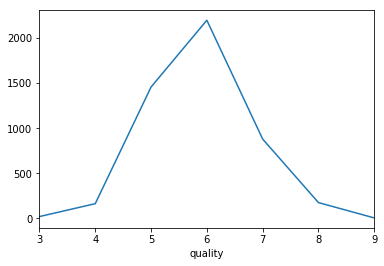

In [123]:
# 품질 데이터별로 그룹을 나누고 수 세어보기
count_data = wine.groupby("quality")["quality"].count()
print(count_data, '\n')

# 수를 그래프로 그리기 (시각화)
print(count_data.plot())

위 그래프를 통해 알 수 있듯이 데이터 품질 대부분이 5~7이며, 이외의 데이터는 별로 없다는 것을 알 수 있습니다. (2 이하와 10은 아예 없음)
이처럼 데이터 수의 분포 차가 큰 데이터를 <span style="color: red;">'불균형 데이터'</span>라고 부릅니다.

따라서 11등급의 데이터를 '4 이하(0)', '5와 7사이(1)', '8이상(2)'이라는 3개로 분류하여 이 문제를 해결 합니다.

0
0     183
1    4535
2     180
Name: 0, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


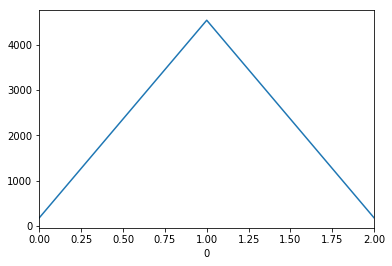

In [124]:
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
        
count_data = pd.DataFrame(newlist[0:]).groupby(0)[0].count()
print(count_data, '\n')
print(count_data.plot())

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 읽어 들이기
wine = pd.read_csv("data/winequality-white.csv", sep=";", encoding="utf-8")

# 데이터를 레이블과 데이터로 분리하기
y = wine["quality"]  # 정답 레이블
x = wine.drop("quality", axis=1)

# (!추가) 레이블 변경하기
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

# 학습 전용과 테스트 전용 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 학습하기
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

# 평가하기
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률 = ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.14      0.23        43
           1       0.94      1.00      0.97       902
           2       0.94      0.43      0.59        35

   micro avg       0.94      0.94      0.94       980
   macro avg       0.85      0.52      0.60       980
weighted avg       0.93      0.94      0.92       980

정답률 =  0.9377551020408164
